## Data balance check

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

In [1]:
from data_loading import read_sparse_X

In [3]:
# Change working directory
os.chdir('/media/HDD_4TB_1/jordi/cfuses_gnn_enrollhd_2024/')

# Data directory
data_dir = "data/features/"

# Input files
X_path = data_dir + "feature_matrix_m3_filt_0.01.txt"
y_path = data_dir + "aoo.txt"

In [4]:
# Load X matrix
X = read_sparse_X(X_path, chunk_size = 100)

# Load outcome vector
y = np.loadtxt(y_path, delimiter='\t', usecols=[1], skiprows=1)

In [5]:
# Extract sex and CAG columns
sexCAG = X[:, 0:2]
sexCAG = sexCAG.toarray()
sexCAG_df = pd.DataFrame(sexCAG, columns=['Sex', 'CAG'])

In [9]:
# Split train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(sexCAG_df, y, test_size = 0.3, shuffle = True, random_state = 51)

# Convert aoo to 1D array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

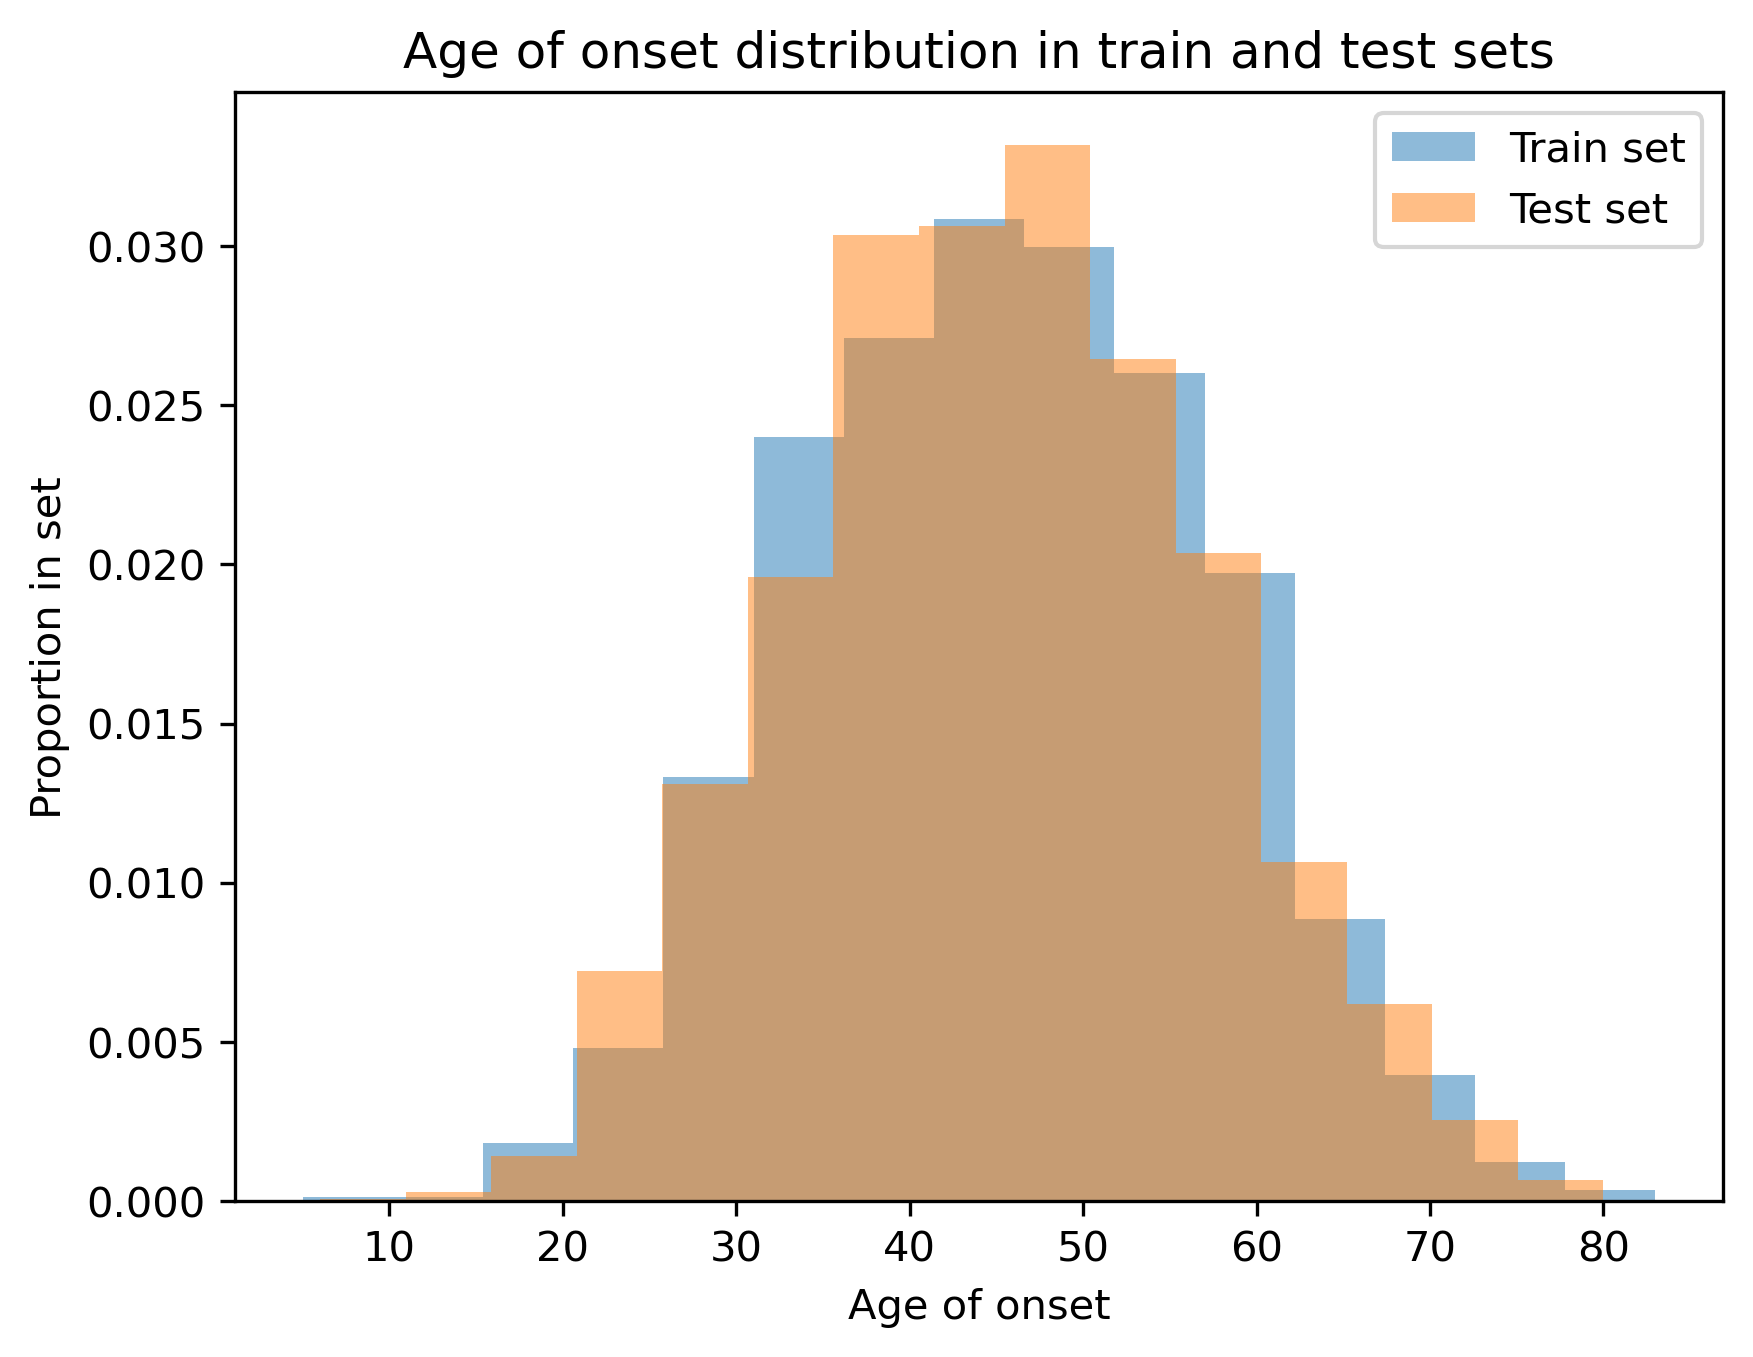

In [11]:
# Distribution of aoo in train and test groups
plt.figure(dpi = 300)
plt.hist(y_train, density=True, label = "Train set", bins=15, alpha=0.5)
plt.hist(y_test, density=True, label = "Test set", bins=15, alpha=0.5)
plt.legend()
plt.xlabel('Age of onset')
plt.ylabel('Proportion in set')
plt.title('Age of onset distribution in train and test sets')
plt.show()

In [12]:
## Sex distribution
# Data to represent
sets = ("X_train", "X_test")
sex_counts = {
    'Female':(len(X_train[X_train['Sex']==2]), len(X_test[X_test['Sex']==2])),
    'Male':(len(X_train[X_train['Sex']==1]), len(X_test[X_test['Sex']==1]))
}

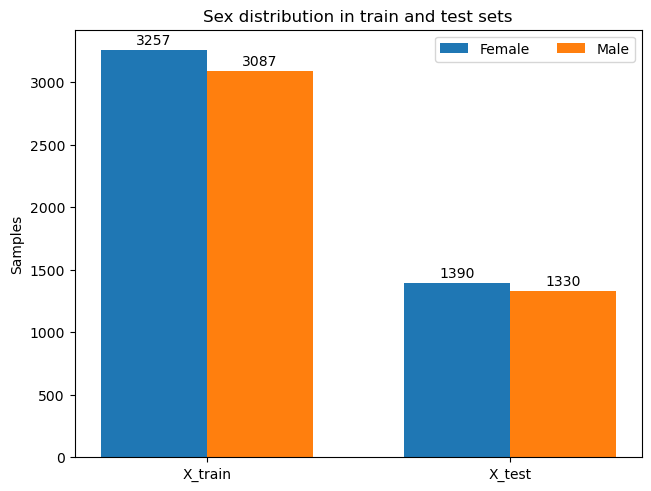

In [13]:
# Plot sex distribution

# Label locations
x = np.arange(len(sets))
width = 0.35  # the width of the bars
multiplier = 0

fig2, ax2 = plt.subplots(layout='constrained')

for sex, counts in sex_counts.items():
    offset = width * multiplier # horizontal displacement for next bar
    rects = ax2.bar(x + offset, counts, width, label=sex)
    ax2.bar_label(rects, padding=2)
    multiplier += 1

ax2.set_ylabel('Samples')
ax2.set_title('Sex distribution in train and test sets')
ax2.set_xticks(x + width/2, sets)
ax2.legend(loc='best', ncols=2)

plt.show()

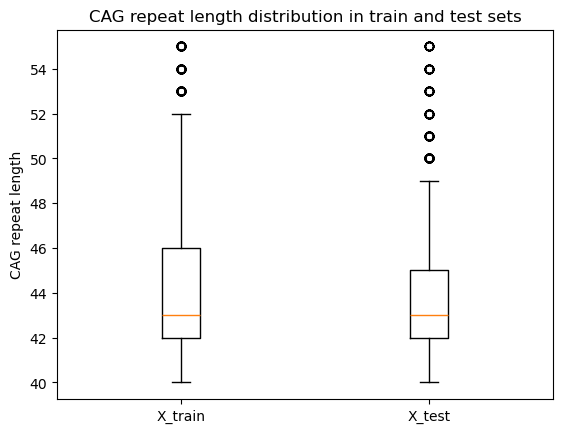

In [14]:
## CAG length distribution

fig3, ax3 = plt.subplots()
ax3.boxplot([X_train['CAG'],X_test['CAG']])

ax3.set_ylabel('CAG repeat length')
ax3.set_xticklabels(['X_train', 'X_test'])
ax3.set_title('CAG repeat length distribution in train and test sets')
plt.show()

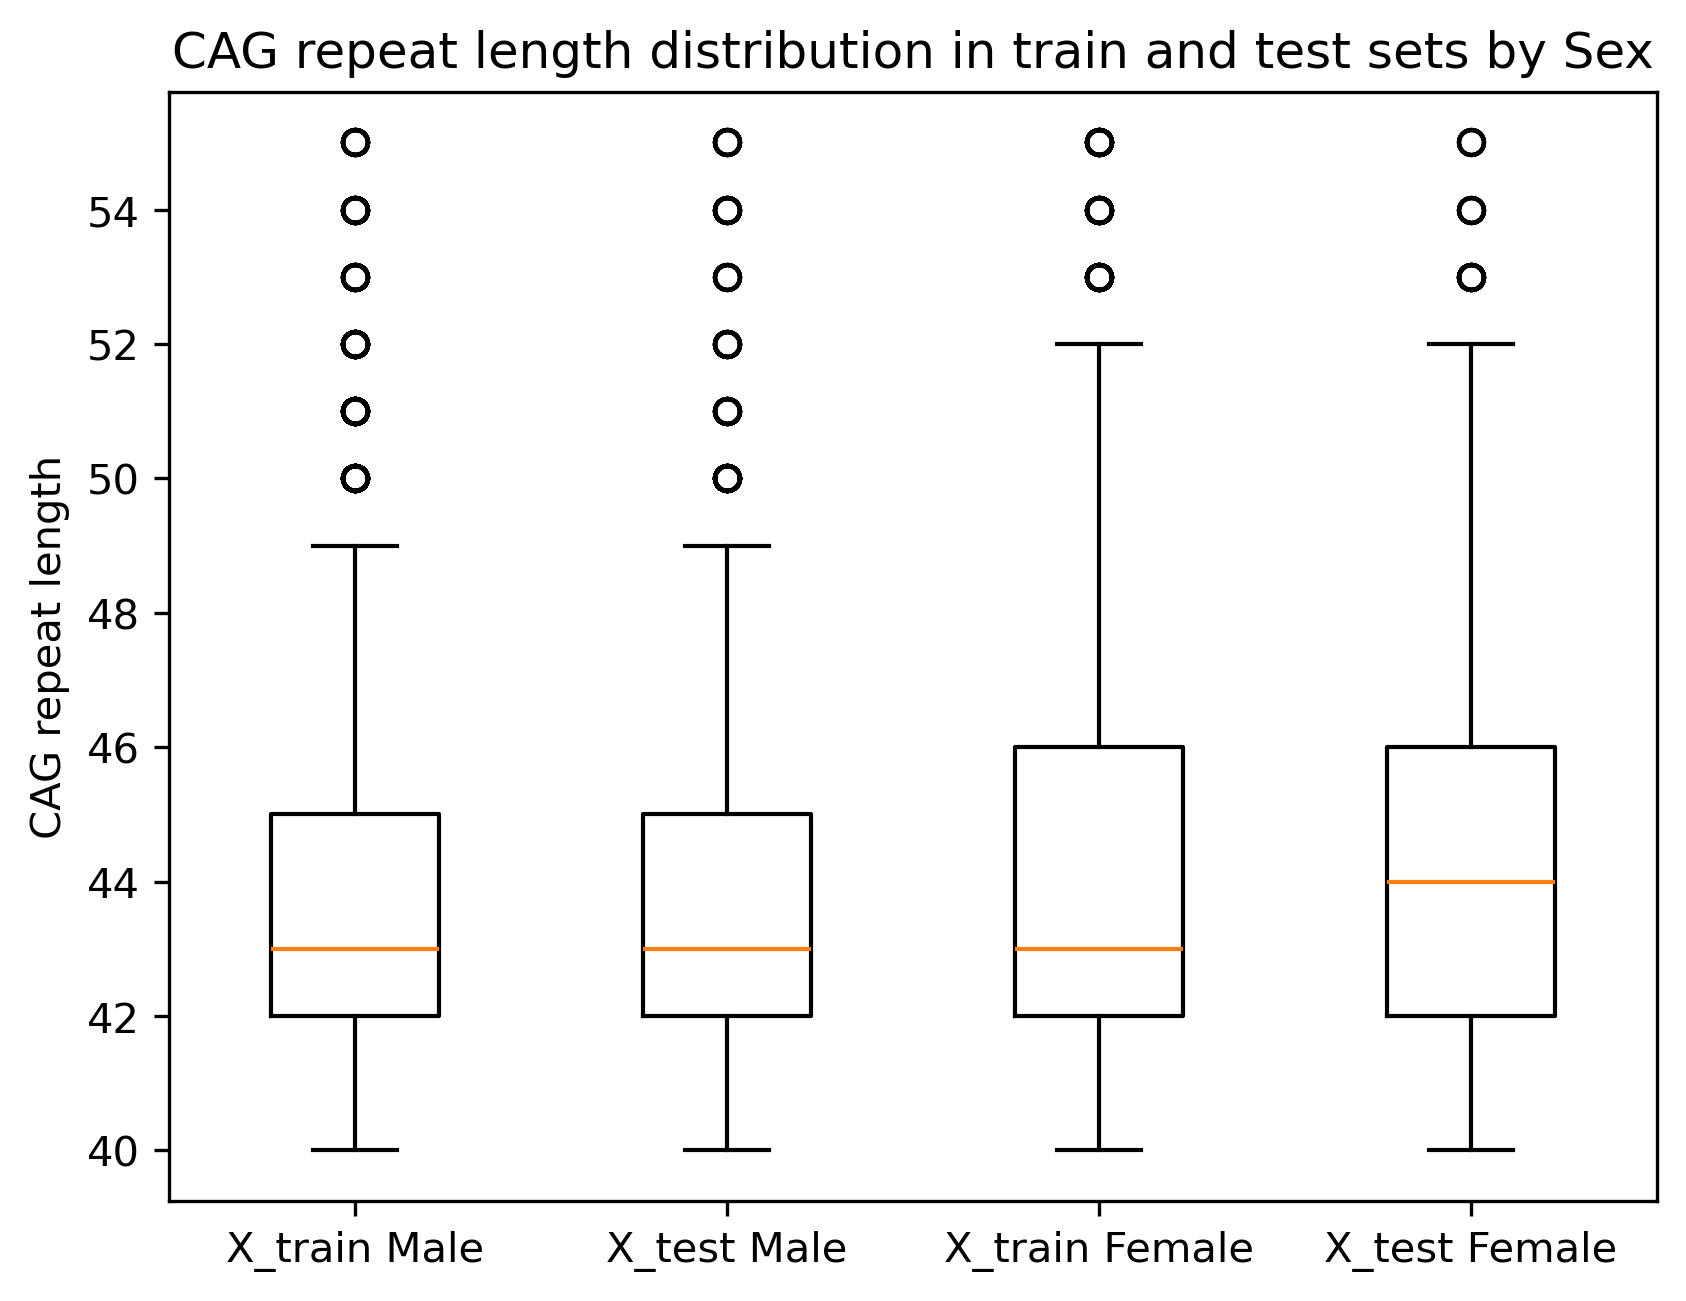

In [16]:
# CAG rep length train and test separating by sex

X_train_male = X_train[X_train['Sex'] == 1]['CAG']
X_train_female = X_train[X_train['Sex'] == 2]['CAG']
X_test_male = X_test[X_test['Sex'] == 1]['CAG']
X_test_female = X_test[X_test['Sex'] == 2]['CAG']
CAG_sex_distribution = [X_train_male, X_test_male, X_train_female, X_test_female]

# Boxplot
fig4, ax4 = plt.subplots(dpi=300)
ax4.boxplot(CAG_sex_distribution)

# Set labels and title
ax4.set_ylabel('CAG repeat length')
ax4.set_xticklabels(['X_train Male', 'X_test Male', 'X_train Female', 'X_test Female'])

ax4.set_title('CAG repeat length distribution in train and test sets by Sex')

plt.show()